# Data visualisation
Exploration of the train and dev datasets

## Cleaning

### Cleaning the quotes

Replace special quotes by normal ones and remove single quotes to prevent parsing errors.

In [1]:
from utils.clean_dataset import cleanup_dataset

In [2]:
cleanup_dataset("data/train.csv", "data/train_cleaned.csv")

In [3]:
cleanup_dataset("data/dev.csv", "data/dev_cleaned.csv")

### Cleaning the labels

#### Train dataset

In [4]:
import pandas as pd
train = pd.read_csv("data/train_cleaned.csv", header=None, names=["image_name", "Image_URL", "OCR_extracted_text", "Corrected_text", "Humour", "Sarcasm", "Offense", "Motivation", "Overall_sentiment", "Basis_of_classification"])

In [5]:
train.Humour.unique()

array(['hilarious', 'not_funny', 'very_funny', 'funny', 'general',
       'not_sarcastic', 'not_offensive', 'twisted_meaning',
       'very_twisted', 'very_offensive', 'slight'], dtype=object)

In [6]:
train.Sarcasm.unique()

array(['general', 'not_sarcastic', 'twisted_meaning', 'very_twisted',
       'not_offensive', 'very_offensive', 'not_motivational', 'slight',
       'motivational'], dtype=object)

In [7]:
train.Offense.unique()

array(['not_offensive', 'very_offensive', 'slight', 'not_motivational',
       'hateful_offensive', 'very_positive', 'motivational', 'positive'],
      dtype=object)

In [8]:
train.Motivation.unique()

array(['not_motivational', 'motivational', 'positive', nan, 'neutral',
       'very_positive', 'negative', 'very_negative'], dtype=object)

In [9]:
train.Overall_sentiment.unique()

array(['very_positive', 'positive', 'neutral', 'negative',
       'very_negative', nan,
       'positivechandler_Friday-Mood-AF.-meme-Friends-ChandlerBing.jpg'],
      dtype=object)

In [10]:
train.loc[train['Overall_sentiment'] == "positivechandler_Friday-Mood-AF.-meme-Friends-ChandlerBing.jpg"]

,image_name,Image_URL,OCR_extracted_text,Corrected_text,Humour,Sarcasm,Offense,Motivation,Overall_sentiment,Basis_of_classification
670,chandler_f50efbd3af8d0a93a2ecdead0dc5044a.jpg,https://i.pinimg.com/originals/f5/0e/fb/f50efb...,Chandler Trolling on someone else's account BE...,Chandler Trolling on someone else's account BE...,funny,not_sarcastic,not_offensive,not_motivational,positivechandler_Friday-Mood-AF.-meme-Friends-...,NaN


In [11]:
train = train.replace("positivechandler_Friday-Mood-AF.-meme-Friends-ChandlerBing.jpg", "positive")

In [12]:
train.Overall_sentiment.unique()

array(['very_positive', 'positive', 'neutral', 'negative',
       'very_negative', nan], dtype=object)

In [13]:
train.to_csv("data/train_cleaned_with_header.csv", index=False)

In [14]:
train.Basis_of_classification.unique()

array([nan])

#### Dev dataset

In [15]:
dev = pd.read_csv("data/dev_cleaned.csv", header=0, names=["image_name", "Image_URL", "OCR_extracted_text", "Corrected_text", "Humour", "Sarcasm", "Offense", "Motivation", "Overall_sentiment", "Basis_of_classification"])

In [16]:
dev.Humour.unique()

array(['very_funny', 'funny', 'not_funny', 'hilarious', 'general',
       'not_sarcastic', 'very_twisted', 'twisted_meaning'], dtype=object)

In [17]:
dev.Sarcasm.unique()

array(['general', 'not_sarcastic', 'twisted_meaning', 'very_twisted',
       'not_offensive', 'very_offensive', 'slight'], dtype=object)

In [18]:
dev.Offense.unique()

array(['hateful_offensive', 'not_offensive', 'slight', 'very_offensive',
       'not_motivational', 'motivational'], dtype=object)

In [19]:
dev.Motivation.unique()

array(['not_motivational', 'motivational', 'very_positive', 'positive',
       'neutral', 'negative'], dtype=object)

In [20]:
dev.Overall_sentiment.unique()

array(['very_positive', 'negative', 'neutral', 'positive',
       'very_negative', 'image_and_text ', 'text', 'image'], dtype=object)

In [21]:
dev.Basis_of_classification.unique()

array(['image_and_text ', 'image', 'text', nan, 'image_and_text  '],
      dtype=object)

## Train dataset

### Label distribution

### Text analysis

In [100]:
import string
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np

In [23]:
def text_cleaning(row):
    x = row["Corrected_text"]
    if not x or (type(x) == float and math.isnan(x)):
        return None
    cleaned = x.translate(str.maketrans('', '', string.punctuation))
    cleaned = " ".join(cleaned.lower().split())
    return cleaned

In [29]:
train[train["Corrected_text"].isnull()]

,image_name,Image_URL,OCR_extracted_text,Corrected_text,Humour,Sarcasm,Offense,Motivation,Overall_sentiment,Basis_of_classification,text_cleaned
3969,trump_1ciwua.jpg,https://i.imgflip.com/1ciwua.jpg,NaN,NaN,very_funny,general,slight,motivational,positive,NaN,a
3985,trump_85486890.jpg,https://cdn.ebaumsworld.com/mediaFiles/picture...,NaN,NaN,very_funny,general,slight,not_motivational,neutral,NaN,b
3986,trump_1486350110-meme-5.png,https://sportsdaydfw.imgix.net/1486350110-meme...,NaN,NaN,funny,twisted_meaning,very_offensive,motivational,negative,NaN,c
4016,trump_qeqrech7dx3z.jpg,https://i.redd.it/qeqrech7dx3z.jpg,NaN,NaN,not_funny,general,slight,motivational,very_positive,NaN,a
4549,trump_d88.jpg,https://i.kym-cdn.com/photos/images/facebook/0...,NaN,NaN,very_funny,general,slight,motivational,neutral,NaN,b
5016,minion_itm-about-as-ok-with-libs-fuckin-minion...,https://pics.conservativememes.com/itm-about-a...,NaN,NaN,very_funny,general,slight,motivational,neutral,NaN,c
6398,trump_1485530548-donald-trump-and-hillary-clin...,https://im.indiatimes.in/content/itimes/photo/...,NaN,NaN,very_funny,twisted_meaning,not_offensive,not_motivational,positive,NaN,a
6401,trump_amusing-memes.jpg,http://worldwideinterweb.com/wp-content/upload...,NaN,NaN,hilarious,general,not_offensive,not_motivational,positive,NaN,b
6403,trump_clinton-vs-trump-memes.jpg,http://worldwideinterweb.com/wp-content/upload...,NaN,NaN,not_funny,not_sarcastic,very_offensive,motivational,positive,NaN,c


In [30]:
train.loc[[3969, 3985, 3986, 4016, 4549, 5016, 6398, 6401, 6403],"Corrected_text"] = [
    "It's rigged ! it's rigged ! it's a left wing-- no, a right wing-- no, a media conspiracy", 
    "Stage #1 - Action complete Stage #2 make it stick!", 
    "Breaking: Trump signs executive order giving Tom Brady and the new england patriots 41 points", 
    "When you login to your neighbors router using 1234", 
    "I'm gonna build some fancy walls even though I have millions of extra dollars in gonna make the mexicans pay for it", 
    "I'm about as OK with libs burnin' the flag as I am with how much it burns when I piss Fukin minion memes. ~L.", 
    "If Donald and Hillary are together on a boat in the middle of the ocean and it sinks. who survives ? AMERICA",
    "Bruh why this tub of margarine look like Donald Trump ?", 
    "2016 election Trump vs Hillary still a better love story than Twilight", 
]

In [31]:
train["text_cleaned"] = train.apply(lambda row: text_cleaning(row), axis=1)

In [59]:
def print_cloud(text):
    wordcloud = WordCloud(width = 1920,height = 1080, stopwords = STOPWORDS).generate(str(text))
    fig = plt.figure(figsize = (40, 30))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [102]:
def plot_top_n(content, title, cmap="viridis", n=10):
    filtered_words = [word for word in content.split() if word not in STOPWORDS]
    counted_words = Counter(filtered_words)
    top_n = counted_words.most_common(n)
    words, count = zip(*top_n)
    color = plt.get_cmap(cmap)(np.linspace(1, 0, n))
    mpl.style.use('seaborn')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, count, color=color)

Word cloud visualisation of the most frequent words of the dataset

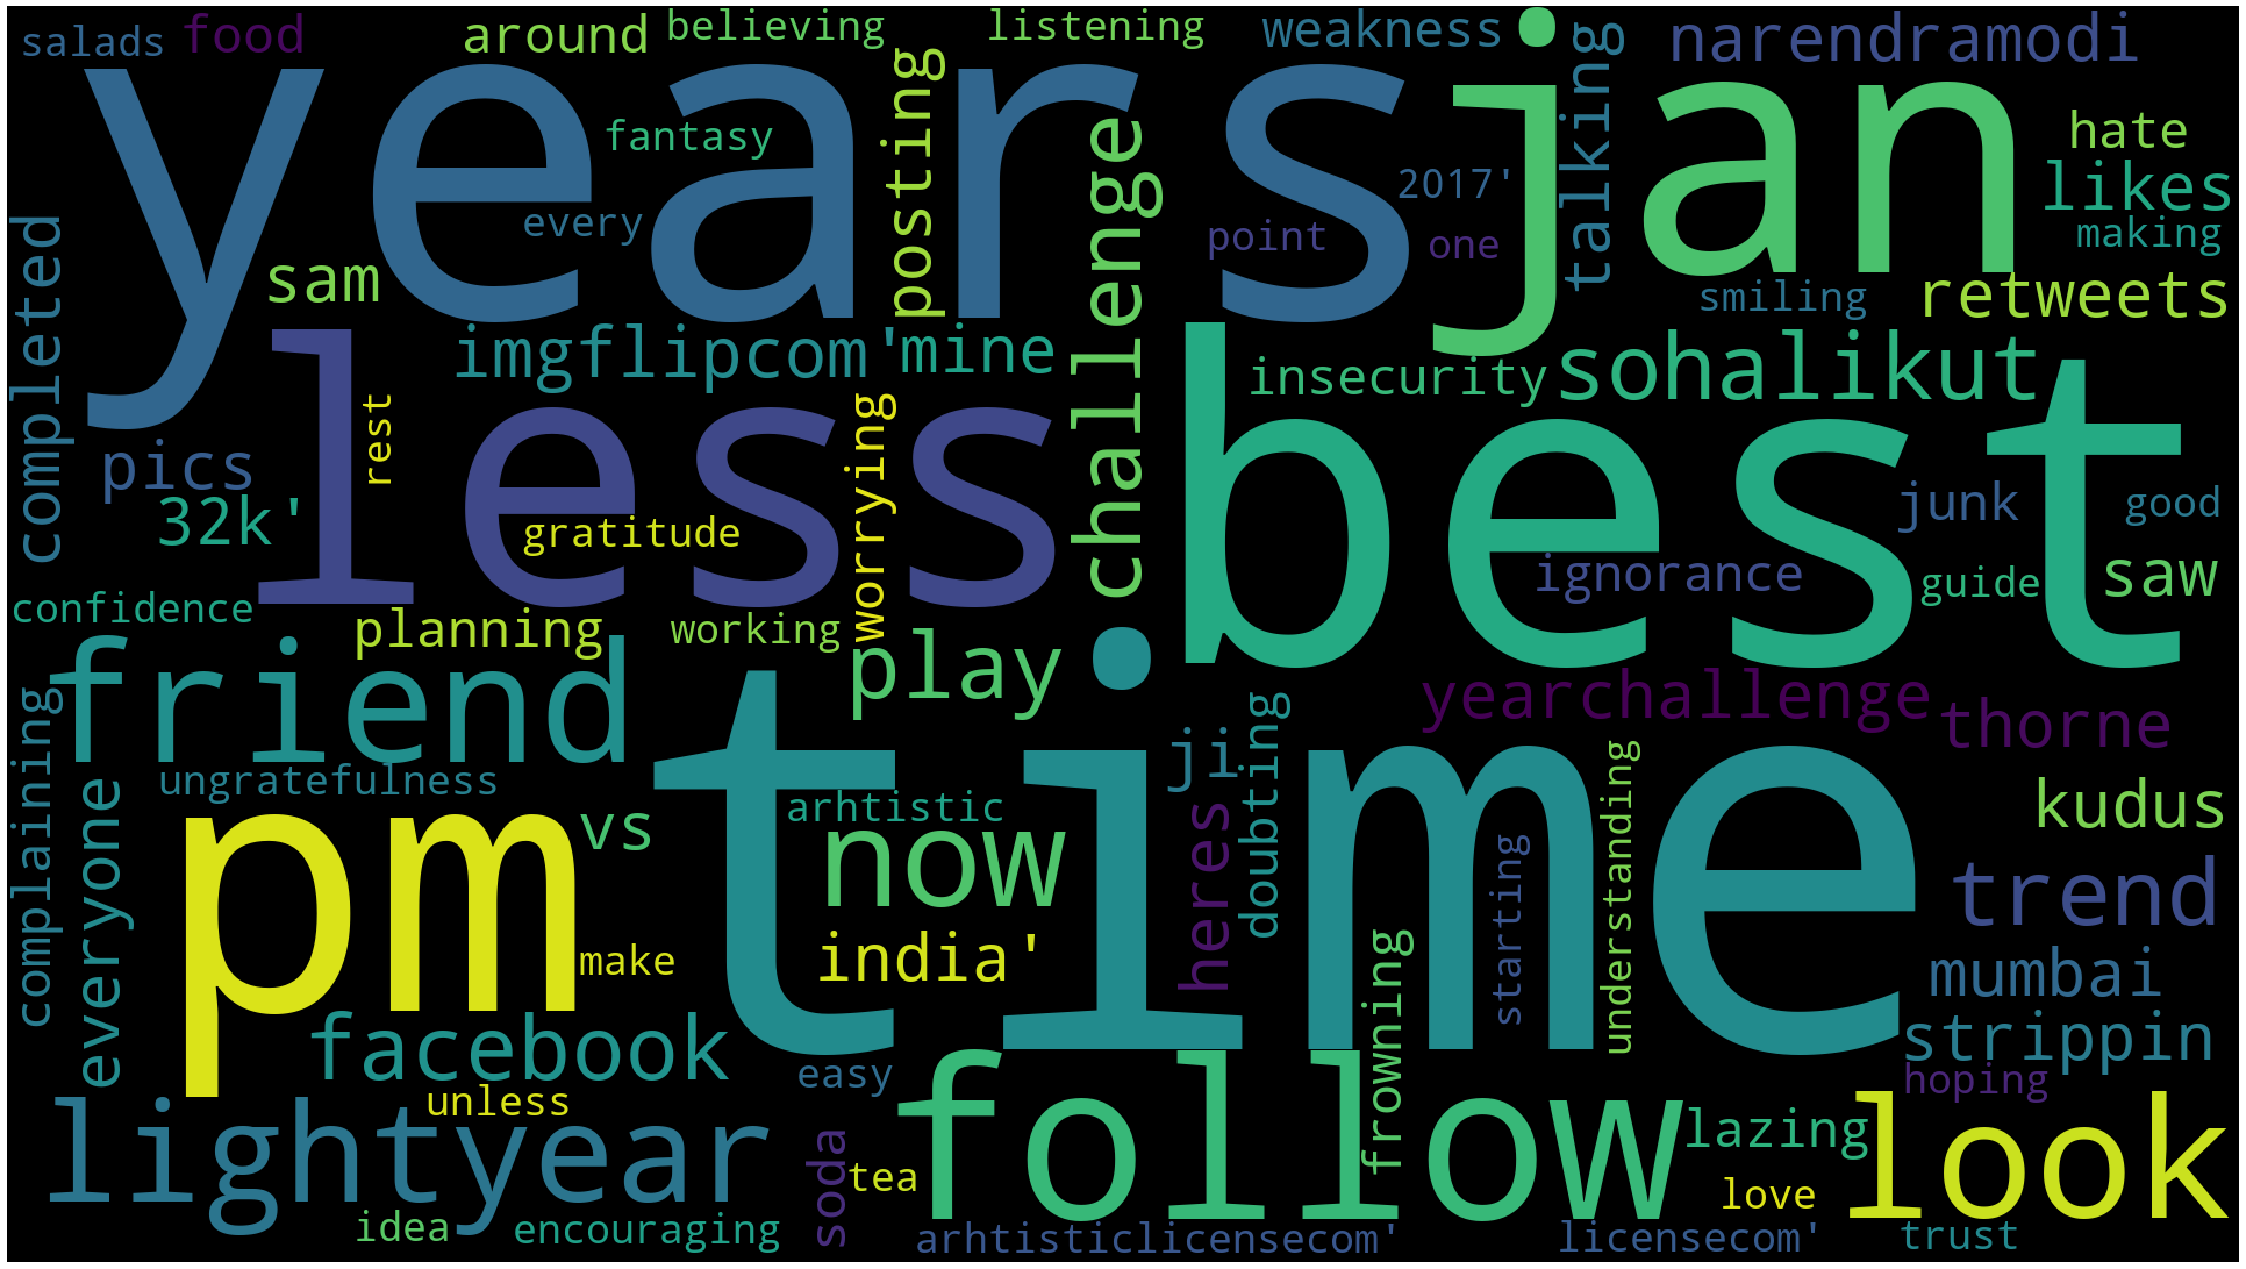

In [60]:
print_cloud(train.text_cleaned.values)

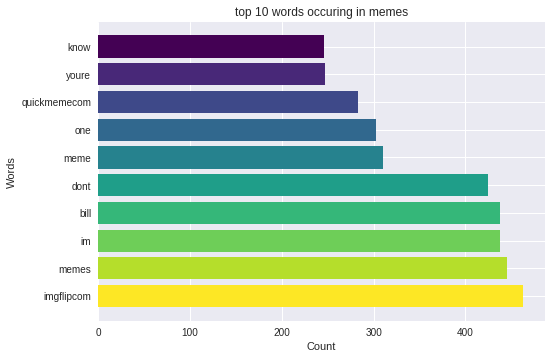

In [115]:
content = ' '.join(train.text_cleaned)
plot_top_n(content, "top 10 words occuring in memes", n=10)

Word cloud visualisation of the most frequent words of humourous memes 

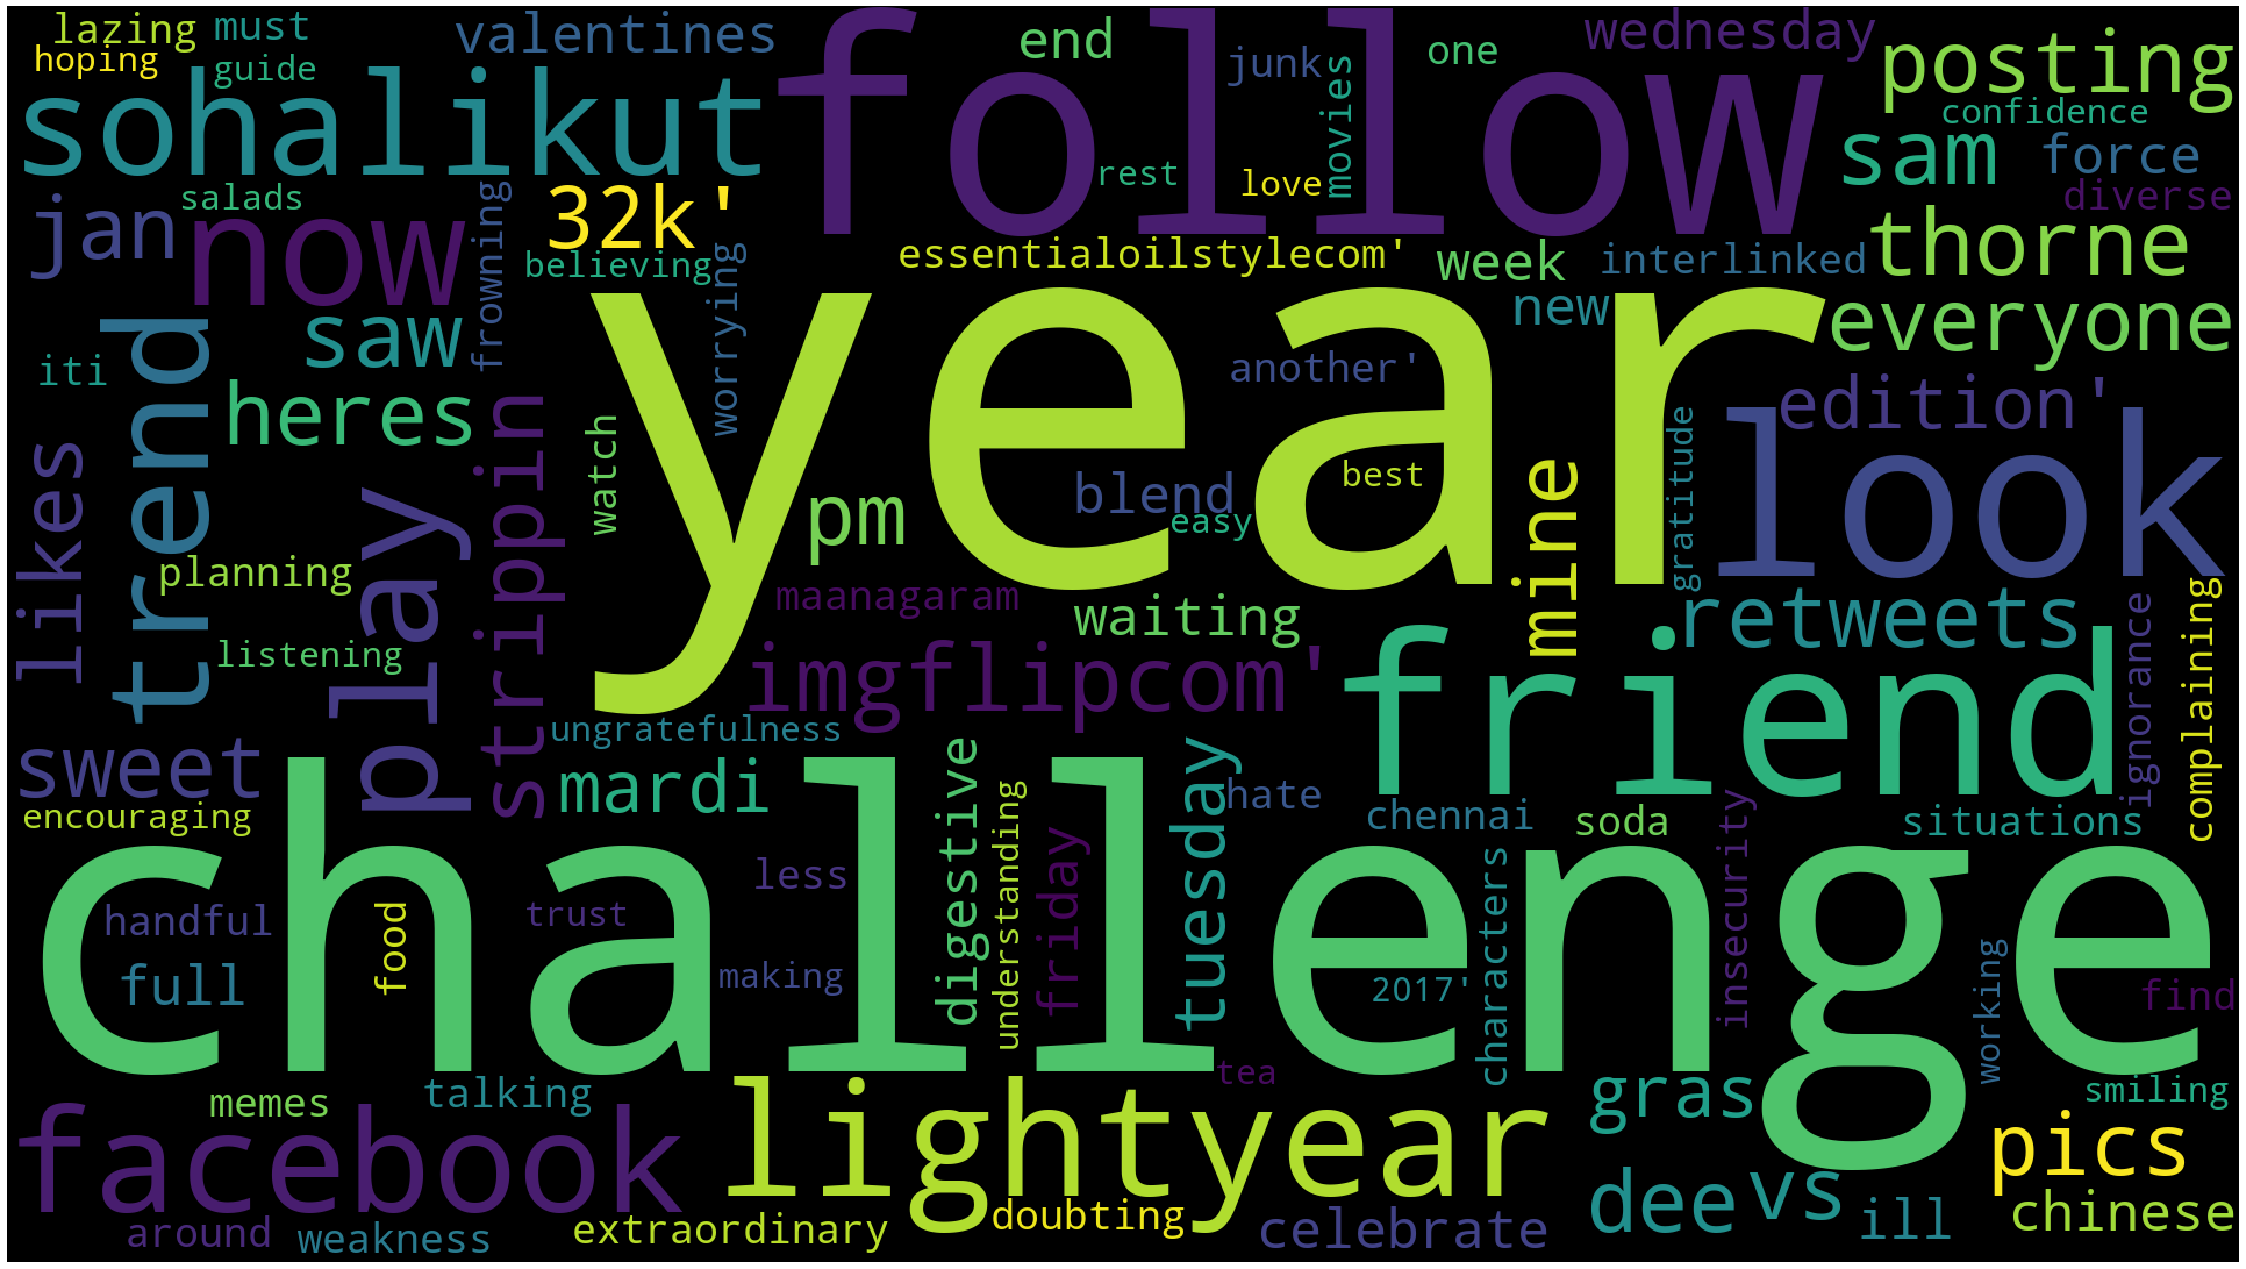

In [106]:
print_cloud(train[train["Humour"] != "not_funny"].text_cleaned.values)

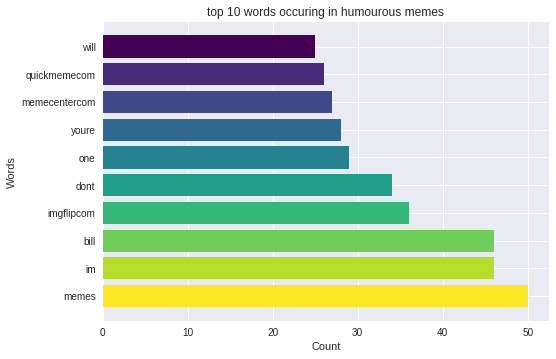

In [112]:
content = ' '.join(train[train["Humour"] == "hilarious"].text_cleaned)
plot_top_n(content, "top 10 words occuring in humourous memes")

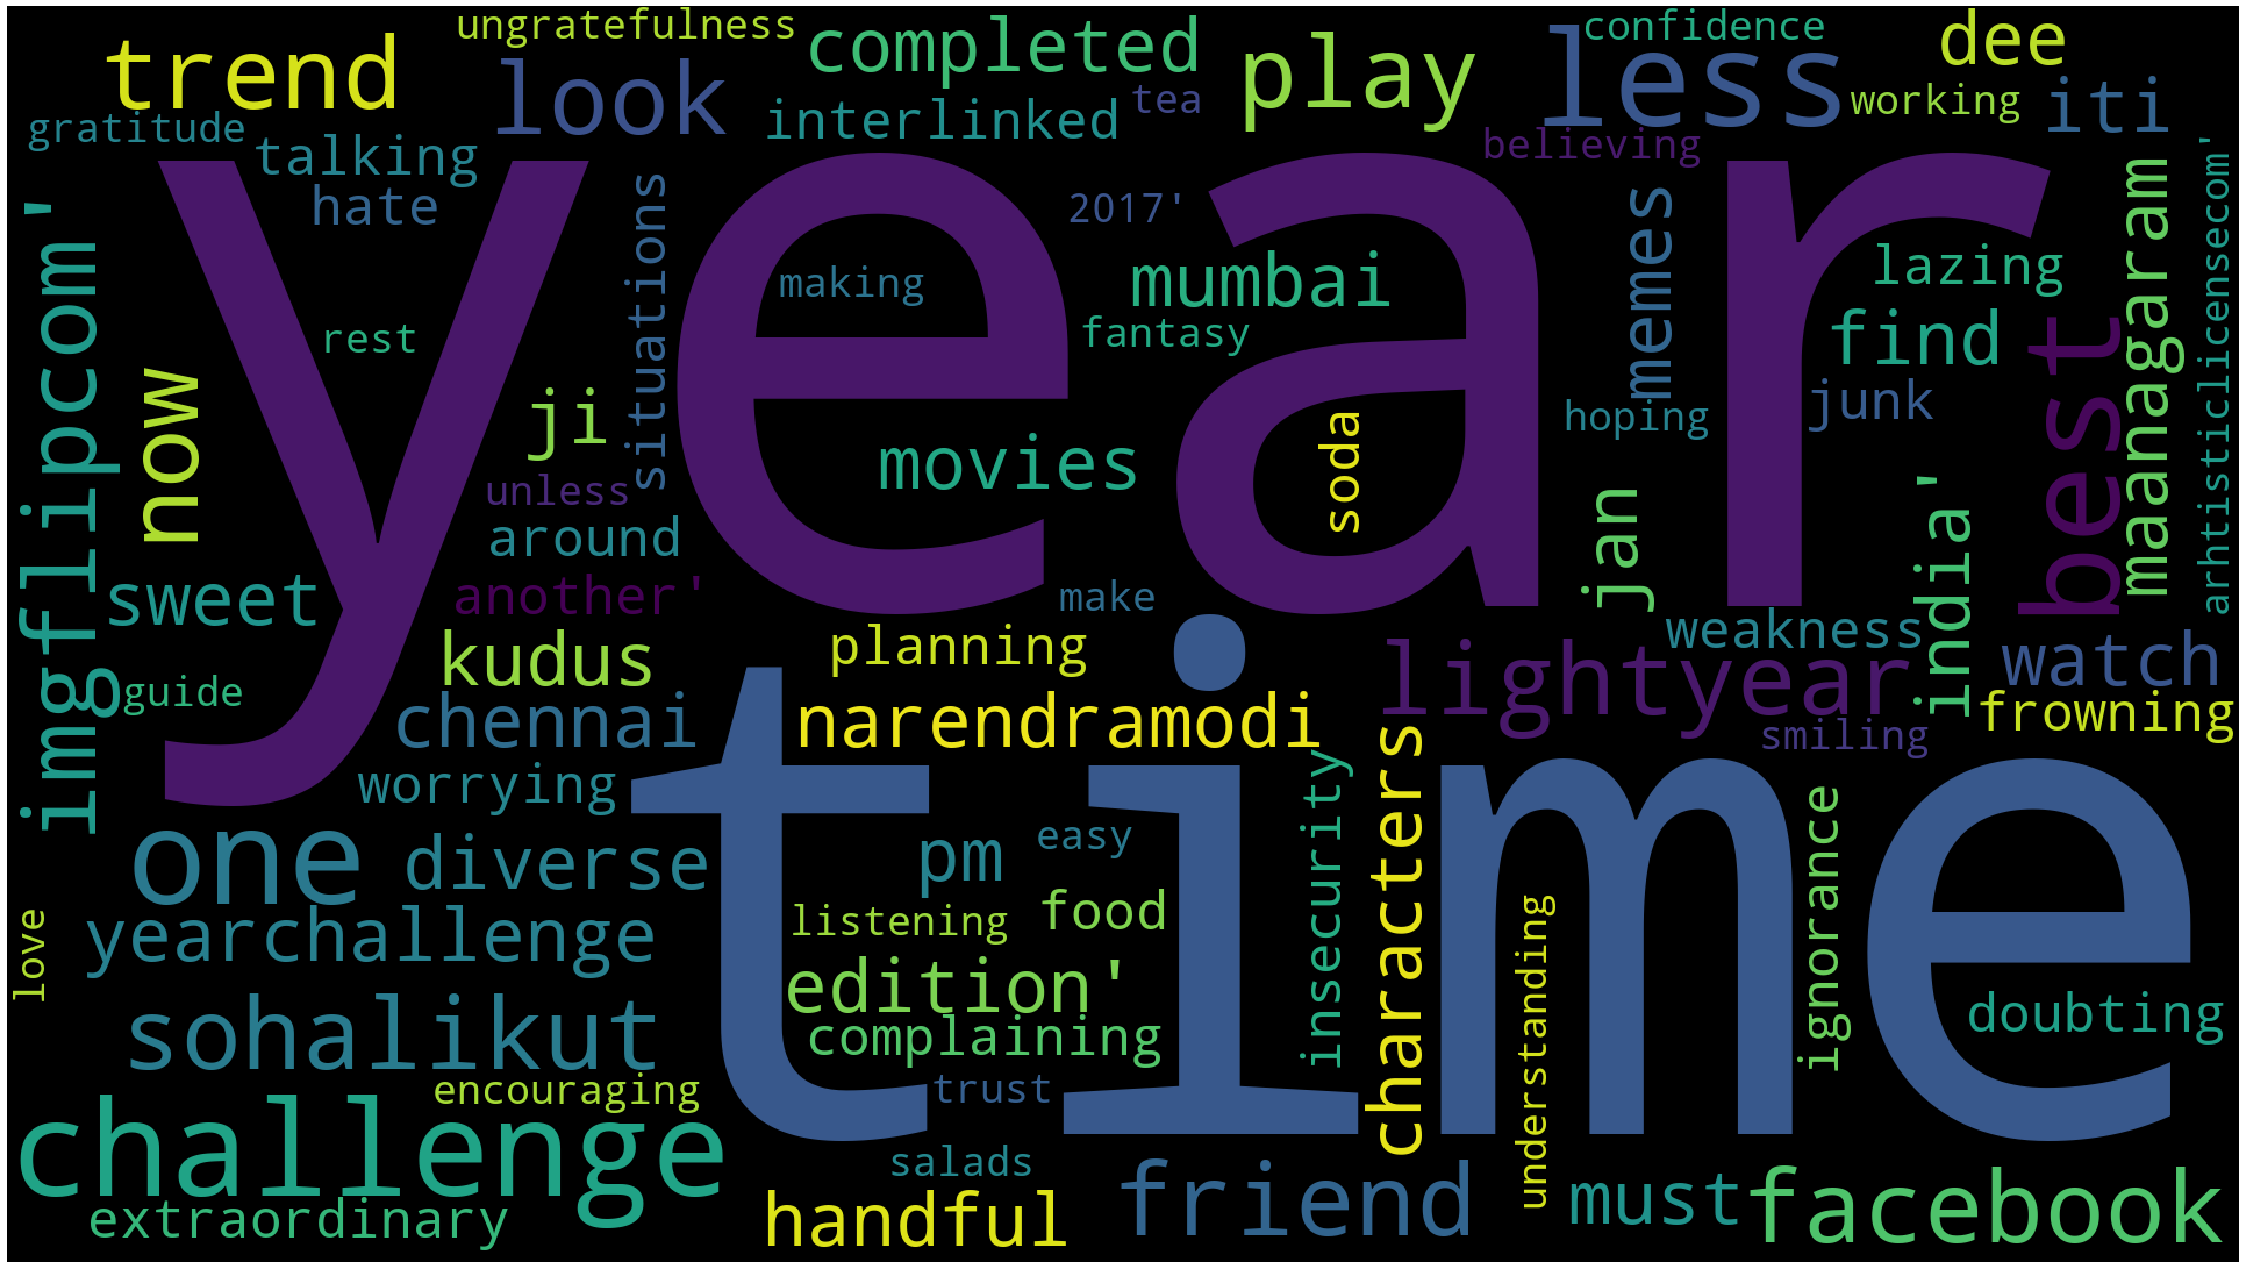

In [62]:
print_cloud(train[train["Sarcasm"] != "not_sarcastic"].text_cleaned.values)

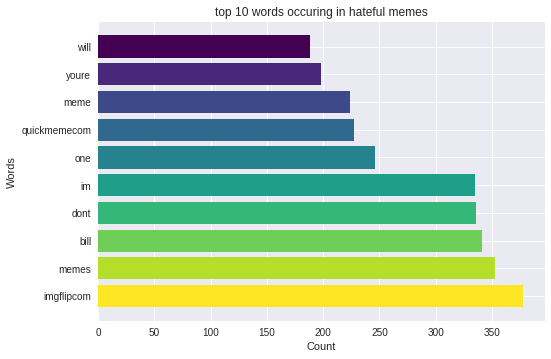

In [119]:
content = ' '.join(train[train["Sarcasm"] != "not_sarcastic"].text_cleaned)
plot_top_n(content, "top 10 words occuring in hateful memes")

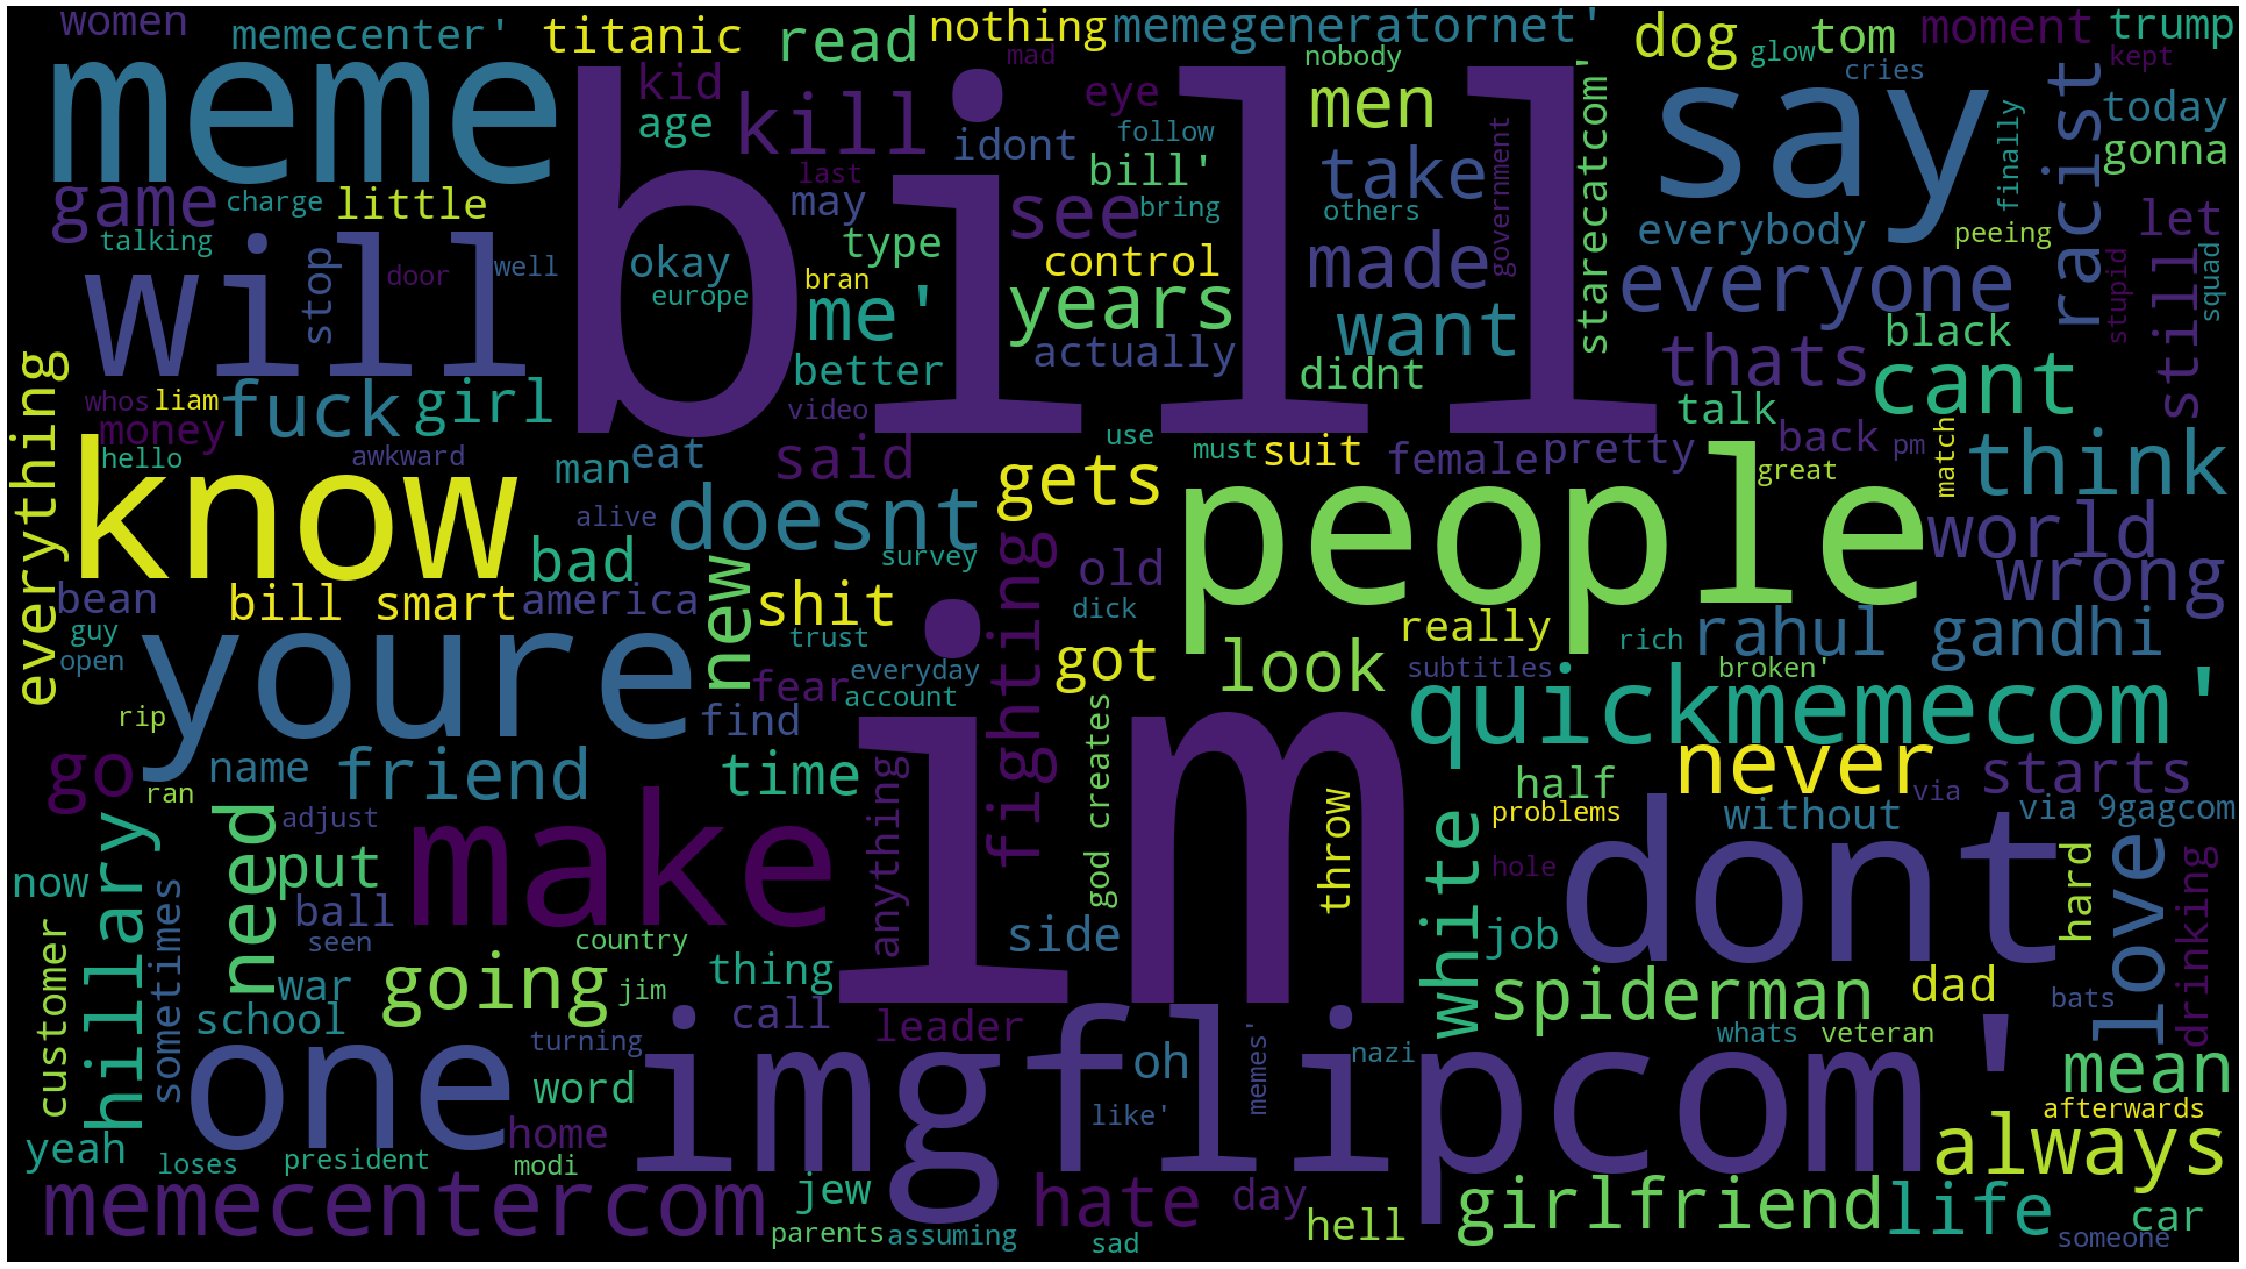

In [73]:
print_cloud(train[train["Offense"] == "hateful_offensive"].text_cleaned.values)

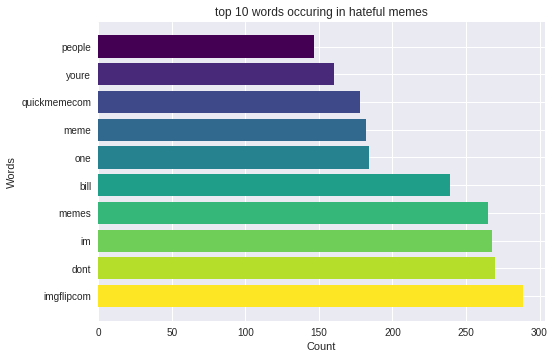

In [116]:
content = ' '.join(train[train["Offense"] != "not_offensive"].text_cleaned)
plot_top_n(content, "top 10 words occuring in hateful memes")

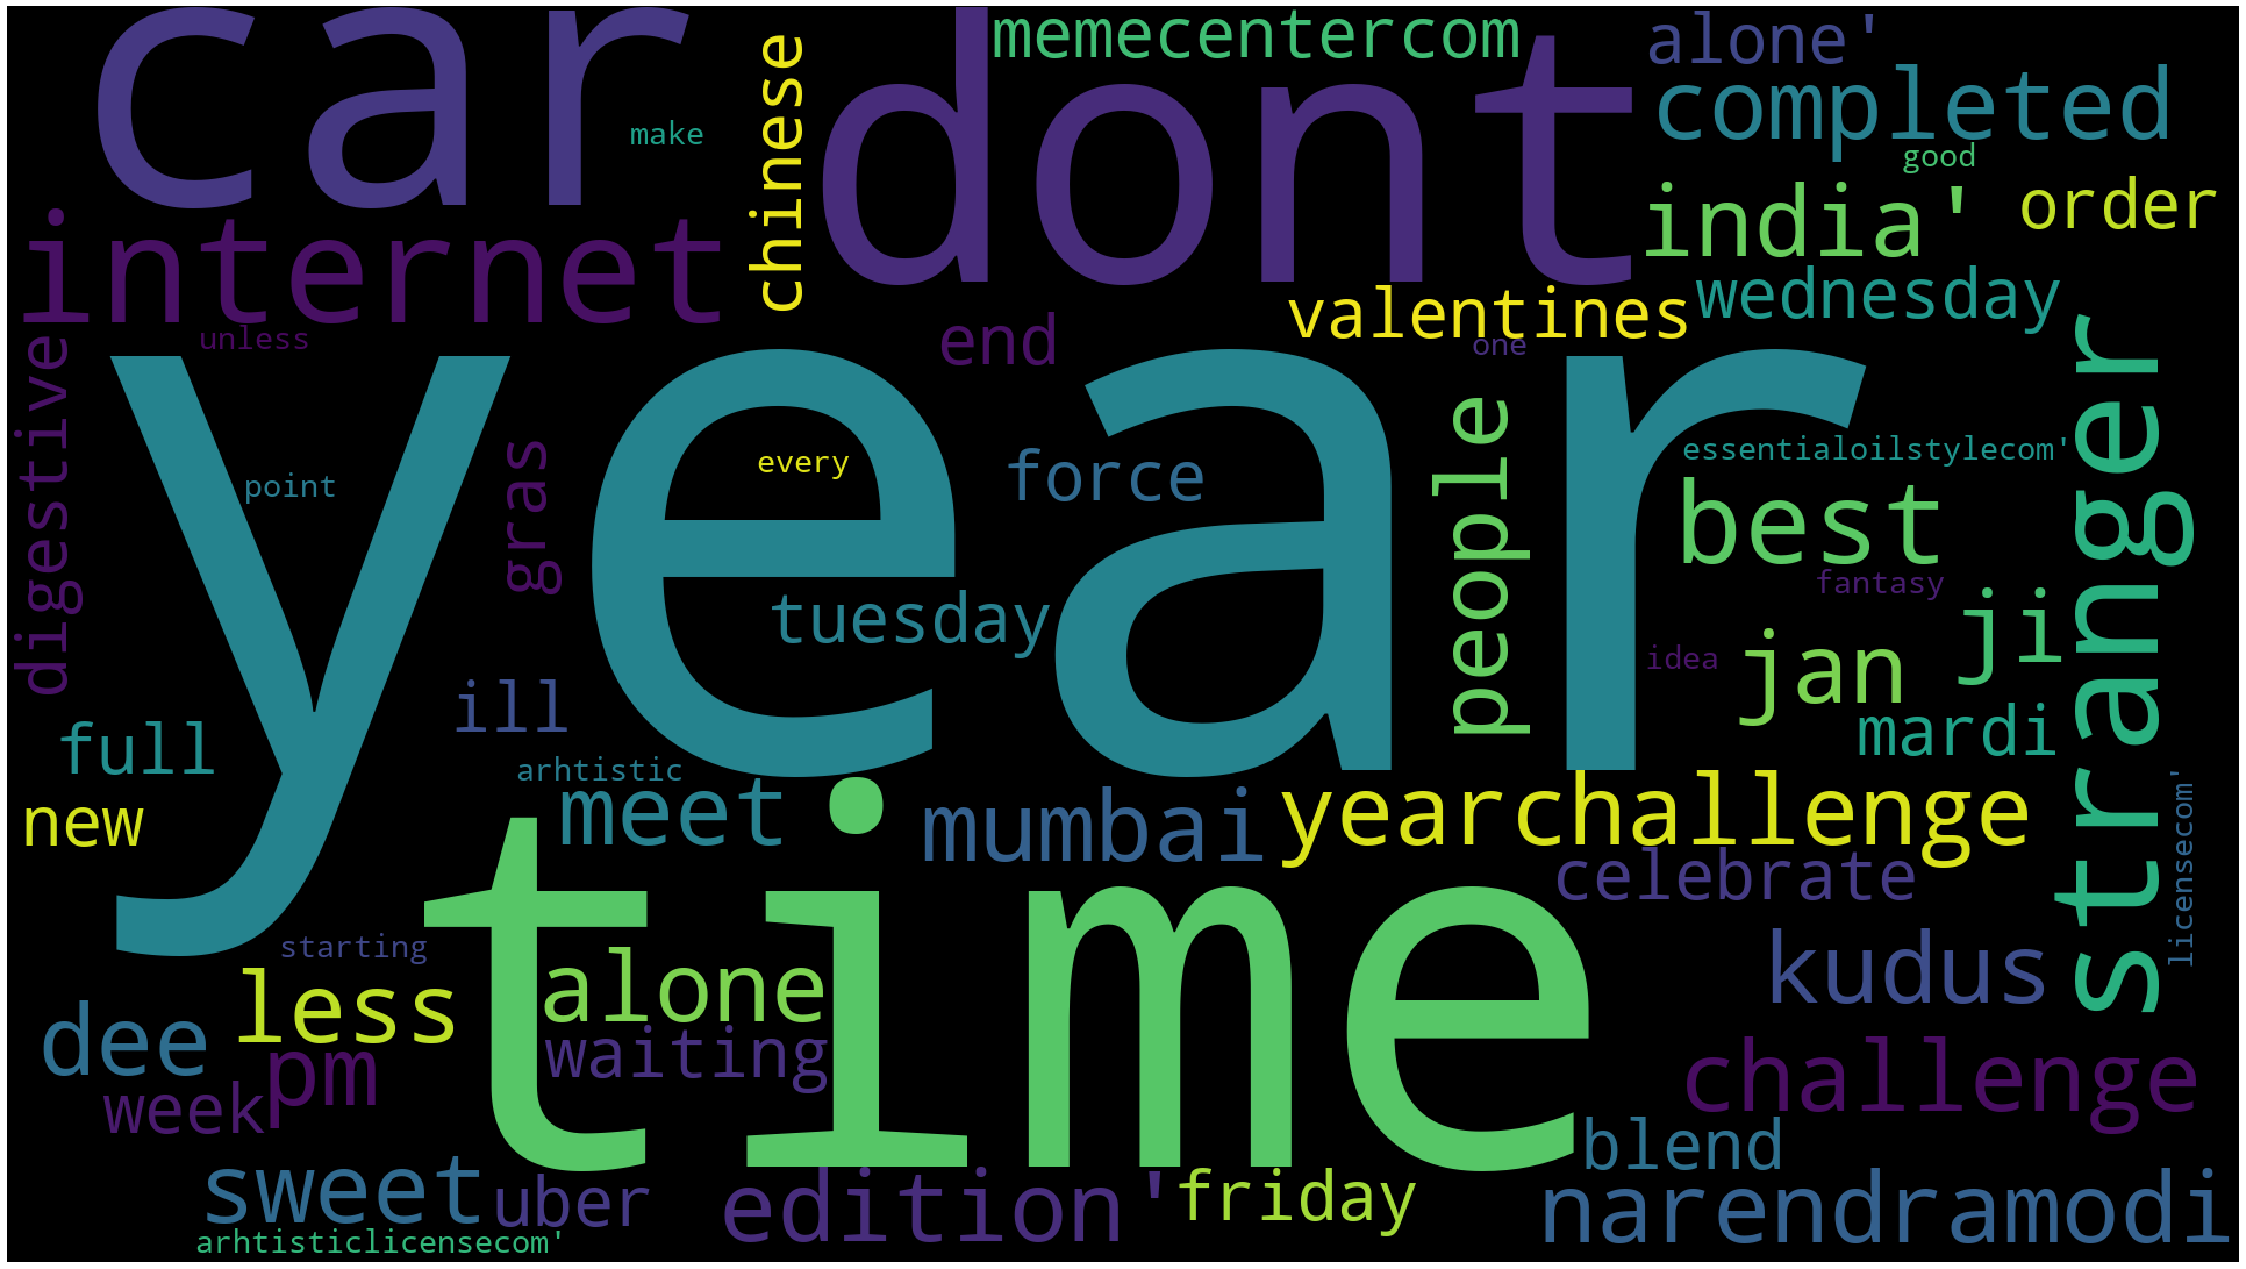

In [72]:
print_cloud(train[train["Motivation"] != "not_motivational"].text_cleaned.values)

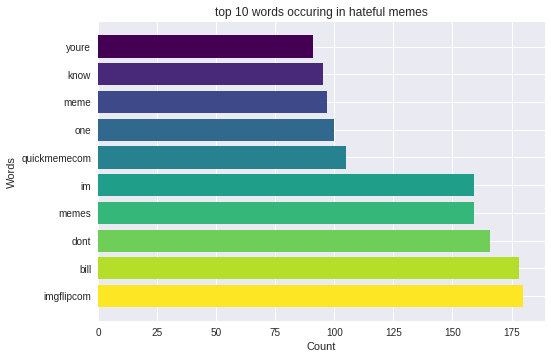

In [118]:
content = ' '.join(train[train["Motivation"] != "not_motivational"].text_cleaned.values)
plot_top_n(content, "top 10 words occuring in hateful memes")